   CustomerID  NumPurchases  AvgPurchaseValue  Frequency  TotalSpending  \
0           1            10               200          2           2000   
1           2            15               150          3           2250   
2           3             8               250          1           2000   
3           4            20               300          4           6000   
4           5            13               180          2           2340   
5           6             9               220          2           1980   
6           7            17               170          3           2890   
7           8             5               290          1           1450   
8           9            14               210          3           2940   
9          10            12               160          2           1920   

        PC1       PC2  
0 -0.783689 -0.231480  
1  0.648997 -1.483145  
2 -1.688177  0.936317  
3  3.782630  1.868451  
4 -0.223543 -0.654040  
5 -0.921294  0.177555  
6  1.2

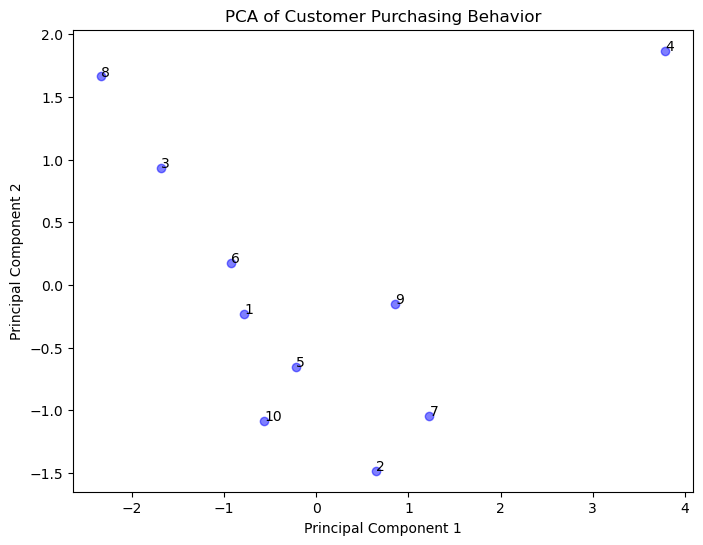

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample customer data
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'NumPurchases': [10, 15, 8, 20, 13, 9, 17, 5, 14, 12],
    'AvgPurchaseValue': [200, 150, 250, 300, 180, 220, 170, 290, 210, 160],
    'Frequency': [2, 3, 1, 4, 2, 2, 3, 1, 3, 2],
    'TotalSpending': [2000, 2250, 2000, 6000, 2340, 1980, 2890, 1450, 2940, 1920]
}
df = pd.DataFrame(data)

# Standardize the data
features = ['NumPurchases', 'AvgPurchaseValue', 'Frequency', 'TotalSpending']
X = df[features]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_standardized)

# Add PCA results to the DataFrame
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Display the data table with PCA results
print(df)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df['PC1'], df['PC2'], c='blue', alpha=0.5)
for i, txt in enumerate(df['CustomerID']):
    plt.annotate(txt, (df['PC1'][i], df['PC2'][i]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Purchasing Behavior')
plt.show()
